# Verify the performance of detecting structures with low quality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from sklearn.metrics import roc_curve, auc

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_csv(score_dir / 'all_score.csv.gz', index_col=0)
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
187595       model_5_seed_1_rec_5_ens_1    0.987   0.971   0.873          NaN   
187596       model_5_seed_1_rec_6_ens_1    0.987   0.971   0.874          NaN   
187597       model_5_seed_1_rec_7_ens_1    0.987   0.971   0.874          NaN   
187598       model_5_seed_1_rec_8_ens_1    0.987   0.970   0.874          NaN   
187599       model_5_seed_1_rec_9_ens_1    0.987   0.971   0.874          NaN   

        Mean_LDDT  Tolerance    ModelName  Seed  Recycle  ...  P3CMQA ProQ2D  \
0           0.901      0.032  model_1_ptm     0       10  ...   0.993  0.836   
1           0.901      0.019  model_1_ptm     0       10  ...   0.993  0.838   
2           0.901     20.749  model_1_ptm     0        1  ...   0.994  0.837   
3           0.901     20.749  model_1_ptm     0        1  ...   0.994  0.843   
4           0.903      0.172  model_1_ptm     0        2  ...   0.991  0.831   
...           ...        ...          ...   ...      ...  ...     ...    ...   
187595        NaN      0.054      model_5     1        5  ...   0.879  0.827   
187596        NaN      0.045      model_5     1        6  ...   0.877  0.832   
187597        NaN      0.044      model_5     1        7  ...   0.884  0.840   
187598        NaN      0.056      model_5     1        8  ...   0.873  0.839   
187599        NaN      0.061      model_5     1        9  ...   0.878  0.833   

        ProQRosCenD  ProQRosFAD  ProQ3D  SBROD Sato-3DCNN  VoroCNN  pLDDT  \
0             0.813       0.975   0.910  1.510      0.876    0.694  0.963   
1             0.812       0.975   0.910  1.511      0.876    0.695  0.964   
2             0.808       0.971   0.905  1.523      0.890    0.694  0.954   
3             0.810       0.974   0.907  1.515      0.884    0.691  0.956   
4             0.799       0.973   0.905  1.517      0.892    0.686  0.958   
...             ...         ...     ...    ...        ...      ...    ...   
187595        0.845       0.963   0.921  1.646      0.916    0.703  0.968   
187596        0.837       0.960   0.921  1.644      0.912    0.700  0.968   
187597        0.853       0.963   0.921  1.645      0.906    0.701  0.967   
187598        0.855       0.964   0.922  1.647      0.907    0.702  0.968   
187599        0.846       0.962   0.921  1.645      0.913    0.703  0.967   

         pTM  
0      0.908  
1      0.910  
2      0.904  
3      0.905  
4      0.906  
...      ...  
187595   NaN  
187596   NaN  
187597   NaN  
187598   NaN  
187599   NaN  

[187600 rows x 38 columns]

## Case 1: Negative examples are structures with the label value is less than the threshold value

In [4]:
# Against gdtts
mqa_methods = ['ProQ3D', 'VoroCNN', 'Sato-3DCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTM']

In [5]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        df[l] = df[label] > threshold
        counts.append(df[l].value_counts())
pd.concat(counts, axis=1).T.fillna(0).astype(int)

True   False
GDT_TS_0.5     186264   1336
GDT_TS_0.6     185371   2229
GDT_TS_0.7     182616   4984
GDT_TS_0.8     176792  10808
GDT_HA_0.5     184536   3064
GDT_HA_0.6     180625   6975
GDT_HA_0.7     164618  22982
GDT_HA_0.8     126456  61144
TMscore_0.5    186326   1274
TMscore_0.6    185830   1770
TMscore_0.7    184428   3172
TMscore_0.8    179940   7660
Mean_LDDT_0.5  169772  17828
Mean_LDDT_0.6  169724  17876
Mean_LDDT_0.7  168007  19593
Mean_LDDT_0.8  154874  32726

In [6]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
df[l]

0         True
1         True
2         True
3         True
4         True
          ... 
187595    True
187596    True
187597    True
187598    True
187599    True
Name: GDT_TS_0.7, Length: 187600, dtype: bool

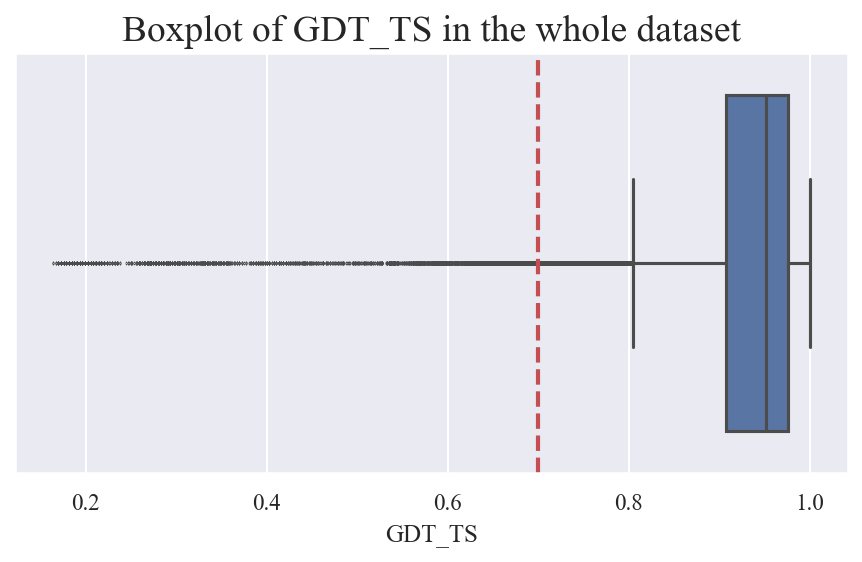

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='GDT_TS', fliersize=0.1)
plt.title('Boxplot of GDT_TS in the whole dataset', fontsize=18)
plt.axvline(x=0.7, color='r', linestyle='--', linewidth=2)
plt.tight_layout()

In [8]:
from sklearn.metrics import roc_curve, auc

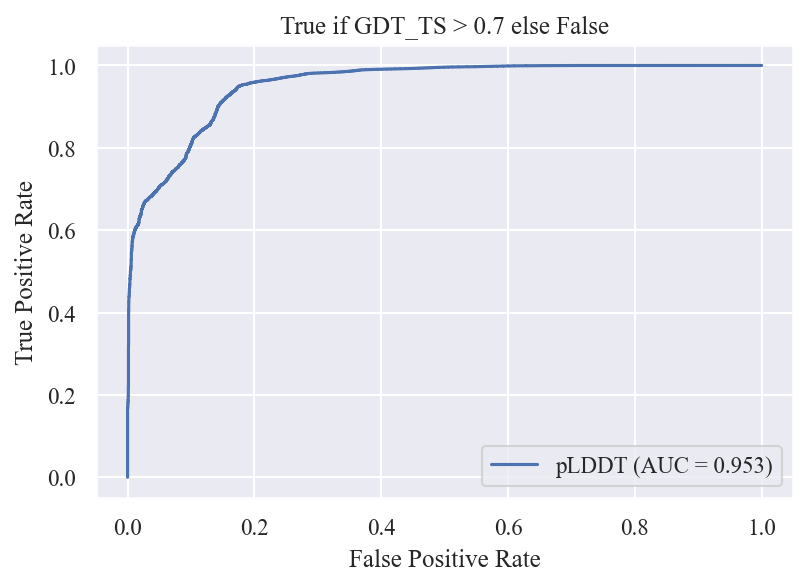

In [9]:
label = 'GDT_TS'
threshold = 0.7
l = f'{label}_{threshold}'
x = df[l]
score = 'pLDDT'
y = df[score]
fpr, tpr, thresholds = roc_curve(x, y)
a= auc(fpr, tpr)
plt.title(f'True if {label} > {threshold} else False')
plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187600 entries, 0 to 187599
Data columns (total 54 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Model                                187600 non-null  object 
 1   TMscore                              187600 non-null  float64
 2   GDT_TS                               187600 non-null  float64
 3   GDT_HA                               187600 non-null  float64
 4   Global_LDDT                          171000 non-null  float64
 5   Mean_LDDT                            171000 non-null  float64
 6   Tolerance                            187600 non-null  float64
 7   ModelName                            187600 non-null  object 
 8   Seed                                 187600 non-null  int64  
 9   Recycle                              187600 non-null  int64  
 10  Ensemble                             187600 non-null  int64  
 11  Target       

True     93131
False      669
Name: GDT_TS_0.5, dtype: int64


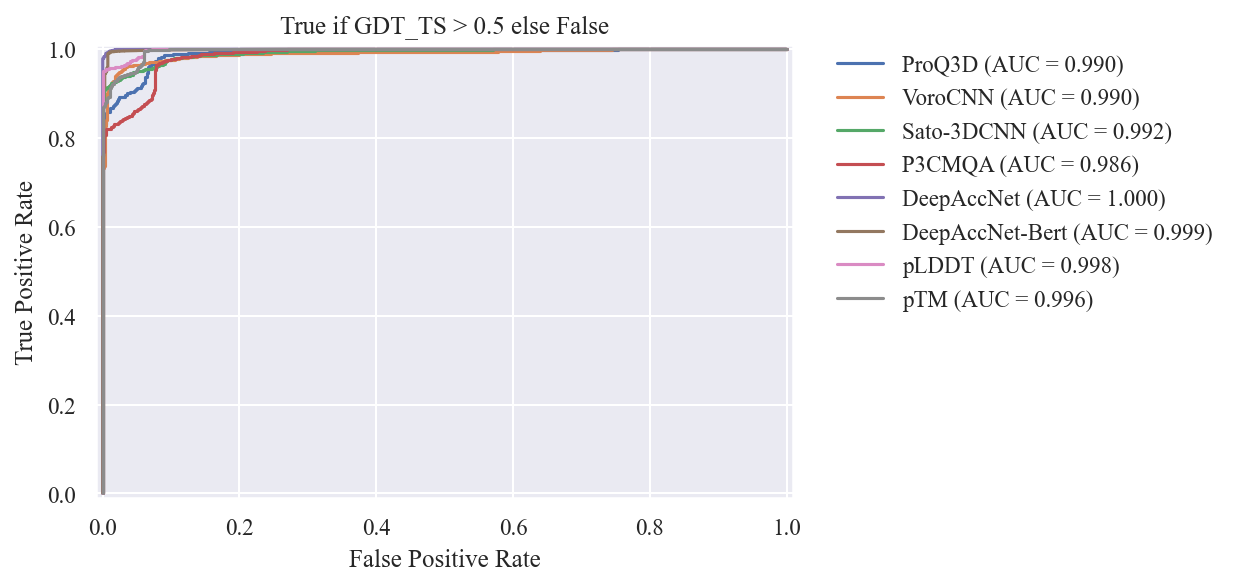

<Figure size 750x600 with 0 Axes>

True     92575
False     1225
Name: GDT_TS_0.6, dtype: int64


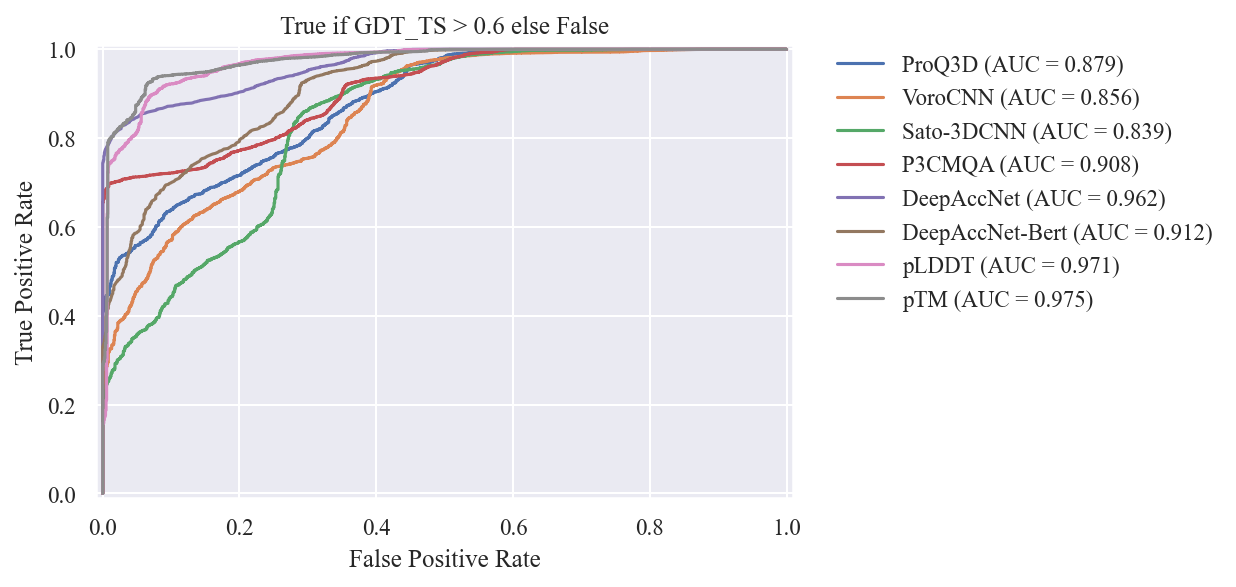

<Figure size 750x600 with 0 Axes>

True     91242
False     2558
Name: GDT_TS_0.7, dtype: int64


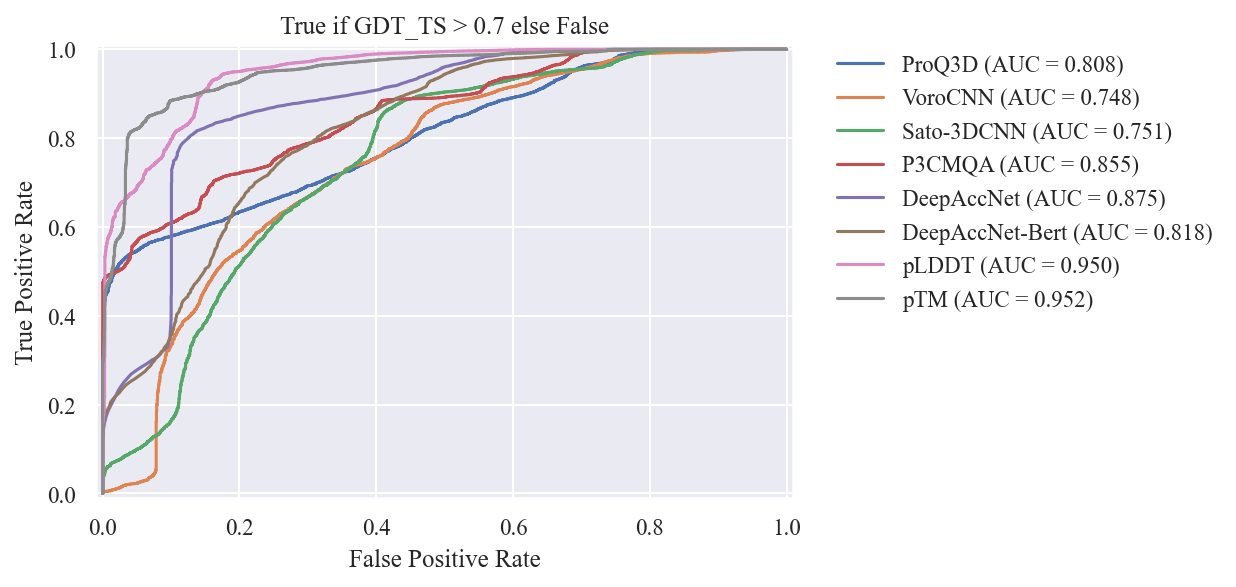

<Figure size 750x600 with 0 Axes>

True     88238
False     5562
Name: GDT_TS_0.8, dtype: int64


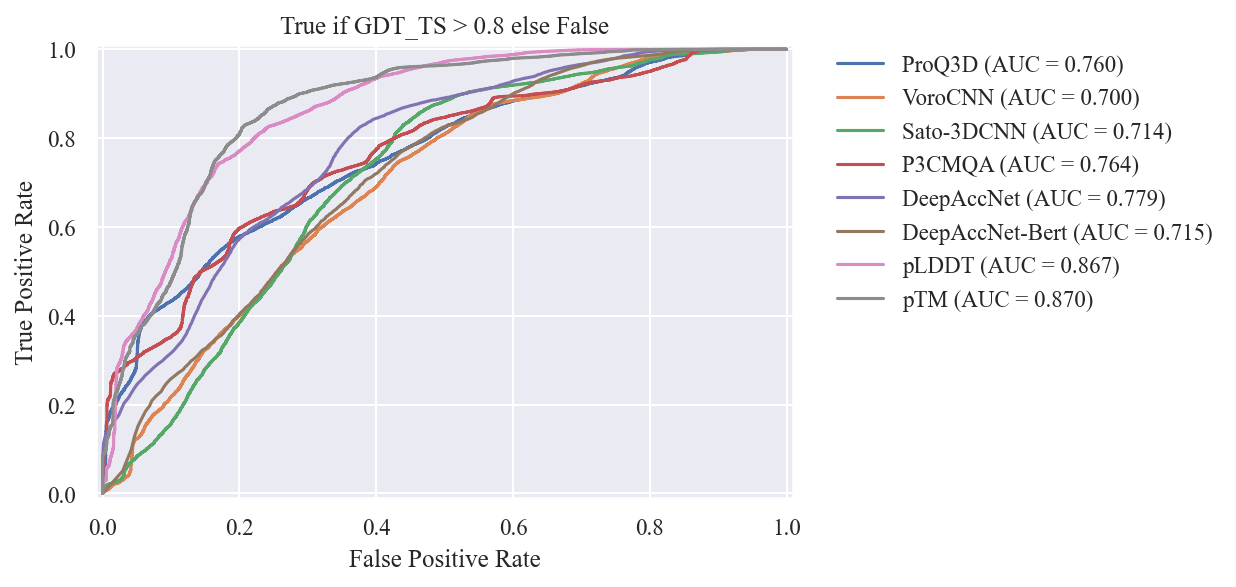

<Figure size 750x600 with 0 Axes>

True     92235
False     1565
Name: GDT_HA_0.5, dtype: int64


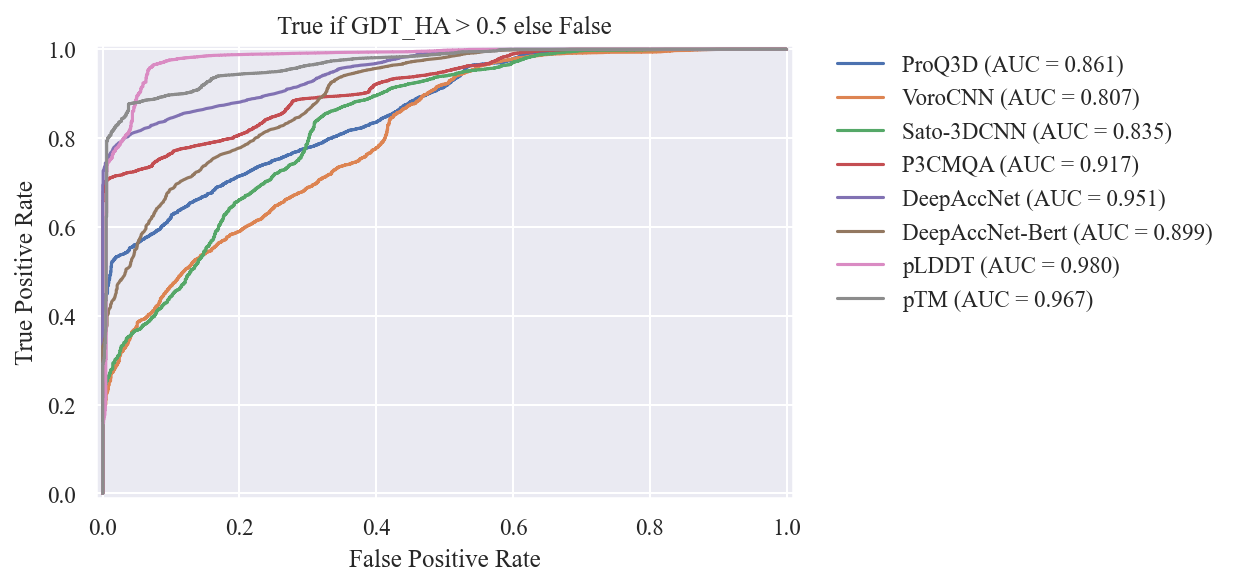

<Figure size 750x600 with 0 Axes>

True     90213
False     3587
Name: GDT_HA_0.6, dtype: int64


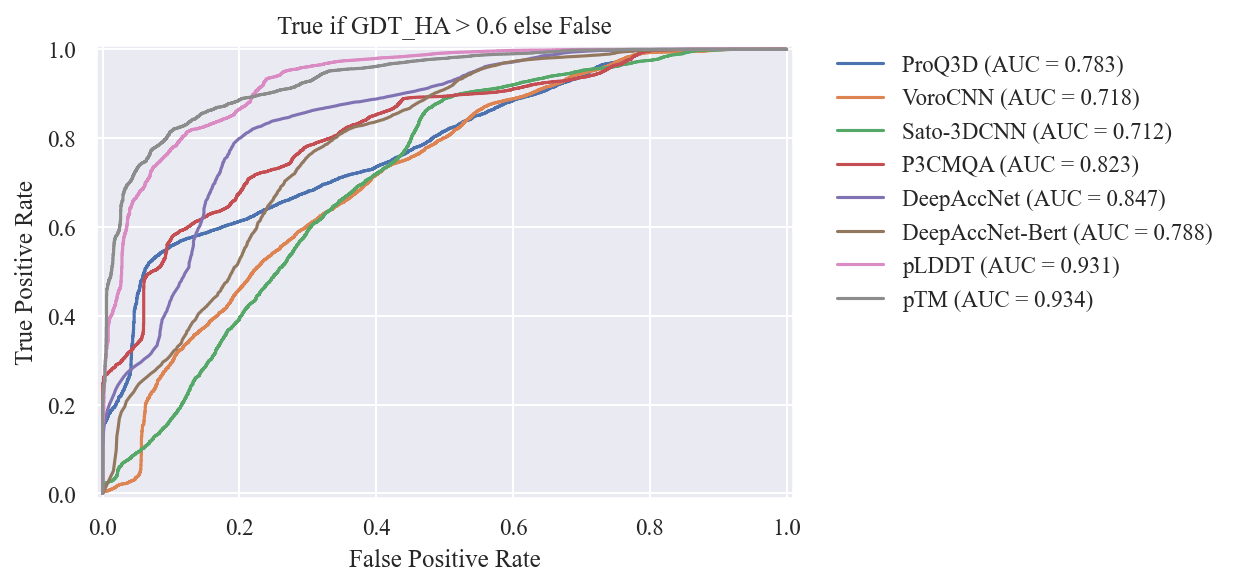

<Figure size 750x600 with 0 Axes>

True     82075
False    11725
Name: GDT_HA_0.7, dtype: int64


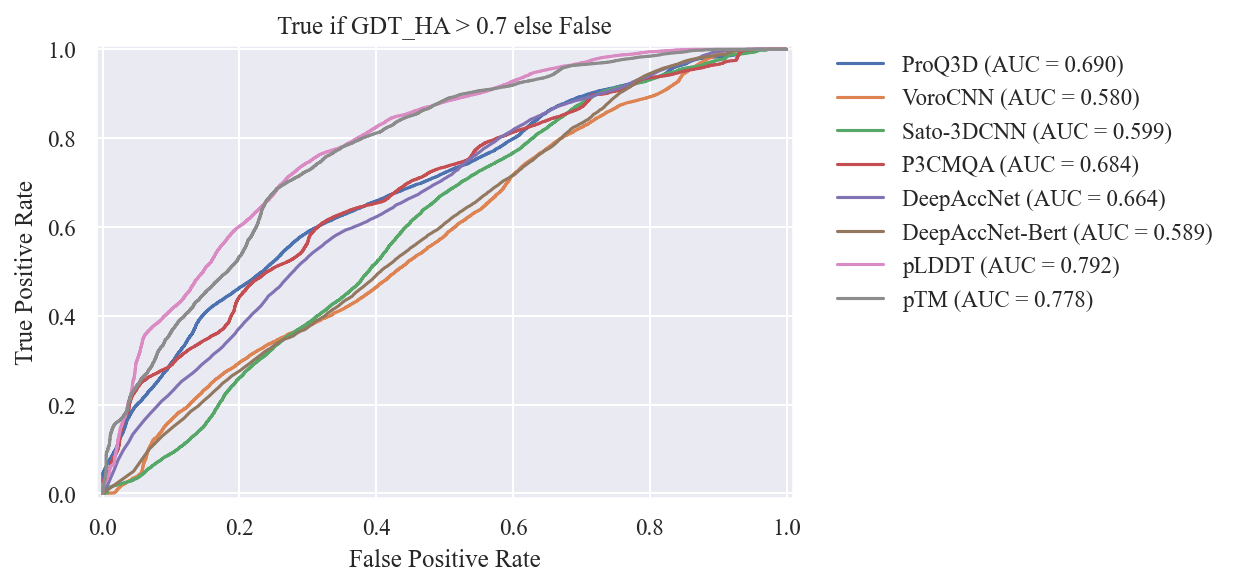

<Figure size 750x600 with 0 Axes>

True     62756
False    31044
Name: GDT_HA_0.8, dtype: int64


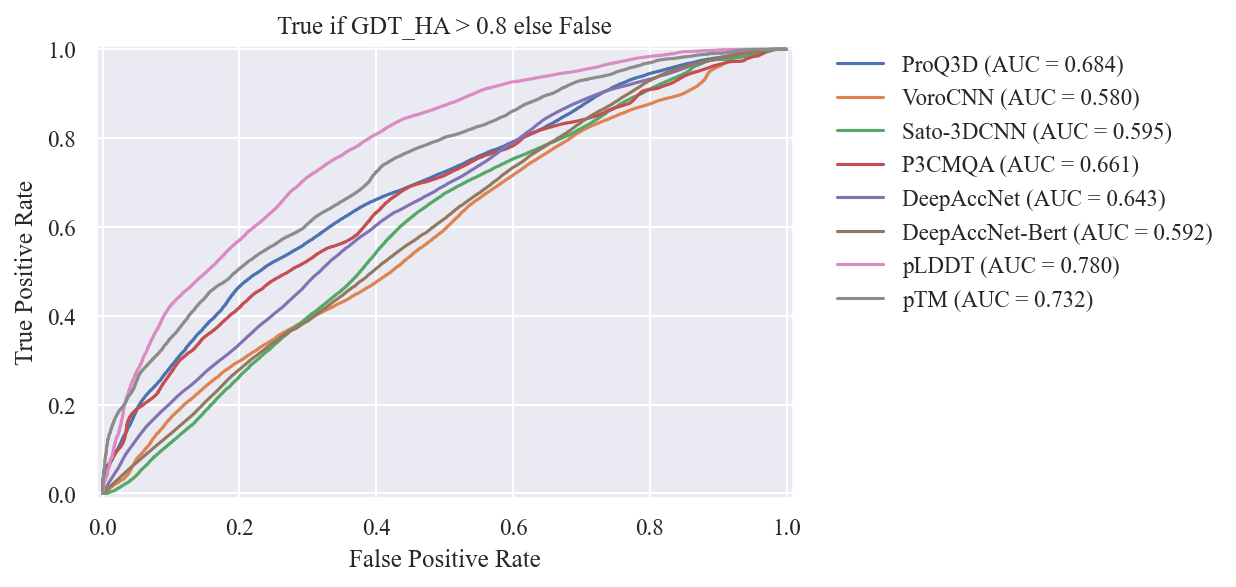

<Figure size 750x600 with 0 Axes>

True     93170
False      630
Name: TMscore_0.5, dtype: int64


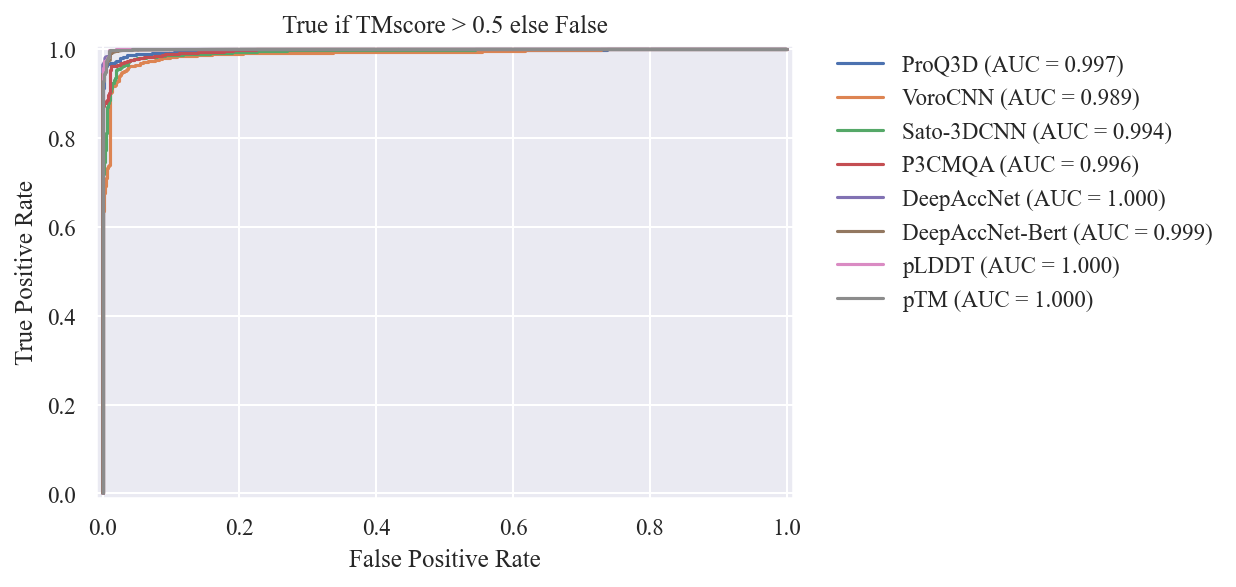

<Figure size 750x600 with 0 Axes>

True     92869
False      931
Name: TMscore_0.6, dtype: int64


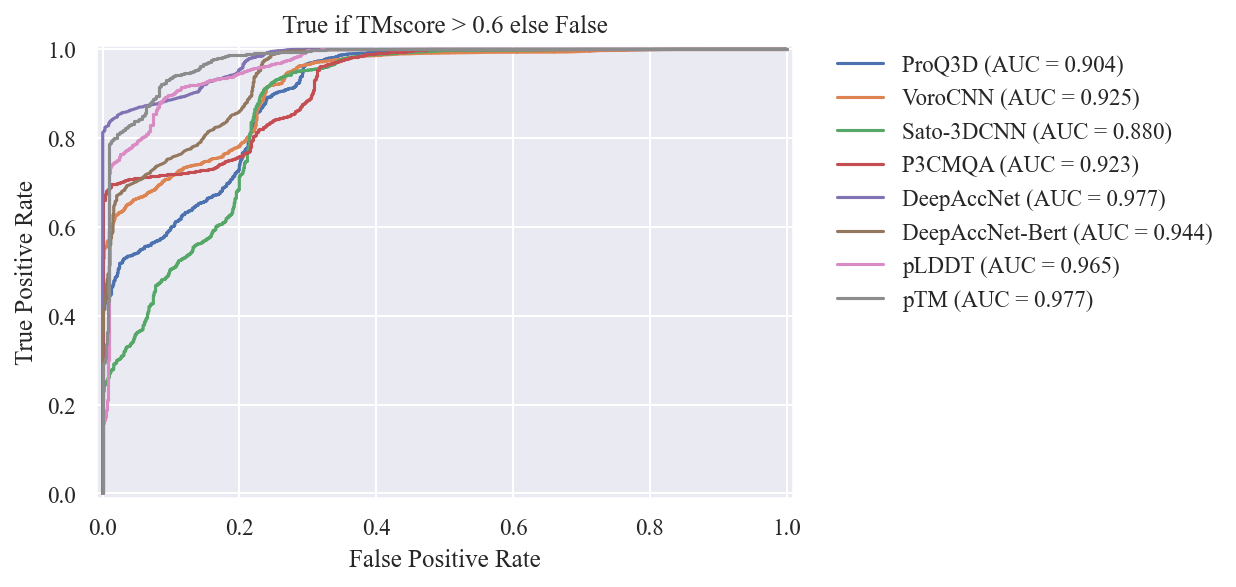

<Figure size 750x600 with 0 Axes>

True     92163
False     1637
Name: TMscore_0.7, dtype: int64


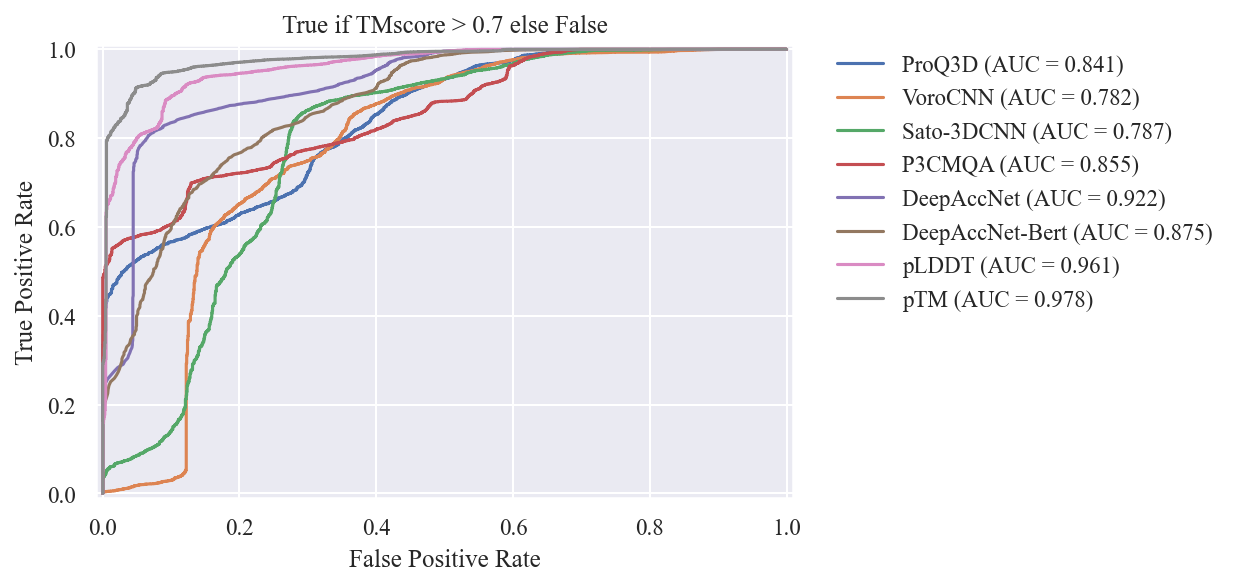

<Figure size 750x600 with 0 Axes>

True     89792
False     4008
Name: TMscore_0.8, dtype: int64


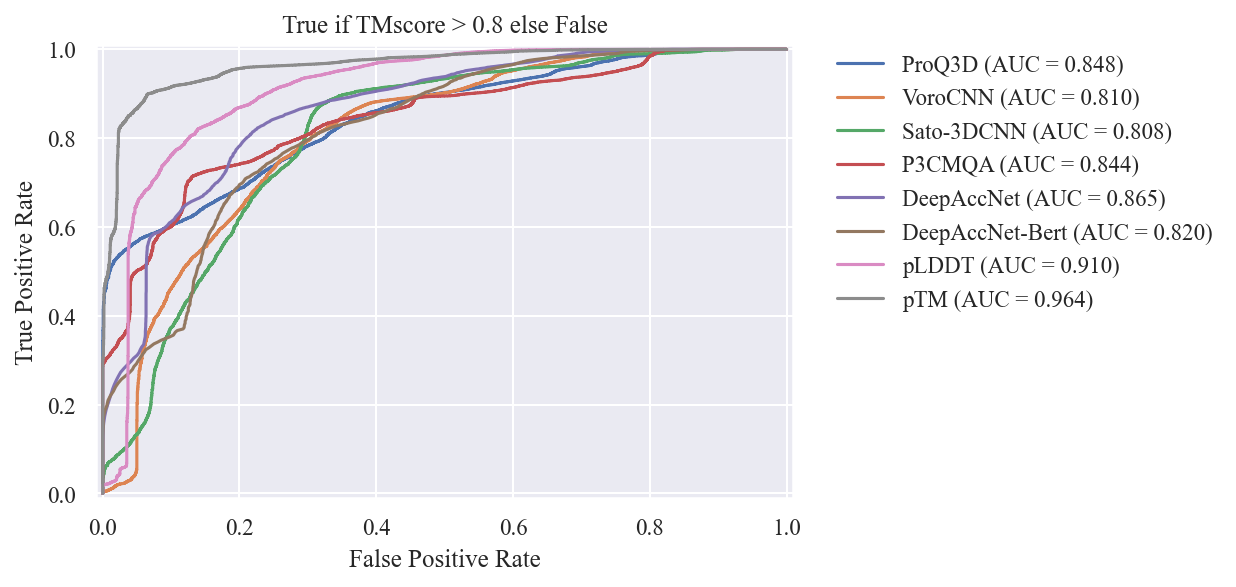

<Figure size 750x600 with 0 Axes>

True     84882
False     8918
Name: Mean_LDDT_0.5, dtype: int64


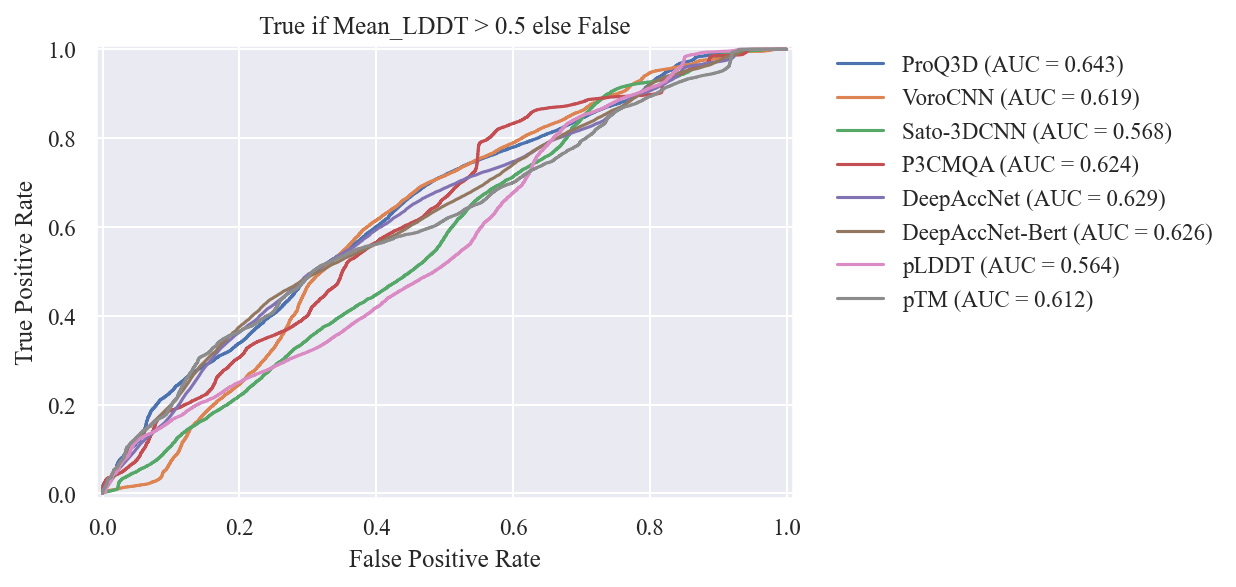

<Figure size 750x600 with 0 Axes>

True     84851
False     8949
Name: Mean_LDDT_0.6, dtype: int64


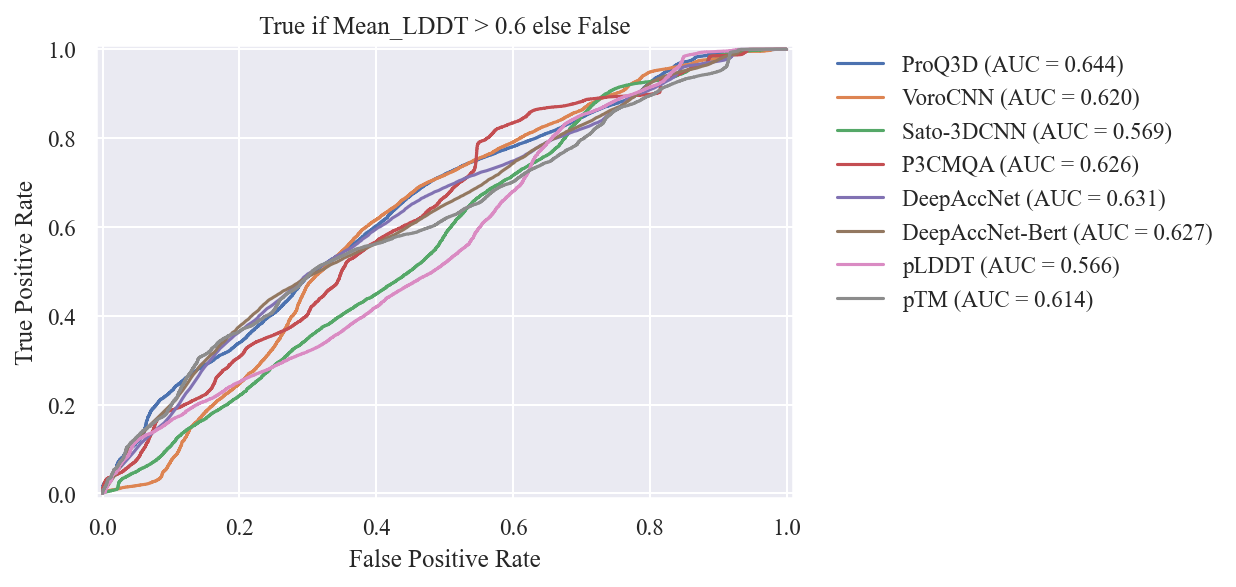

<Figure size 750x600 with 0 Axes>

True     83976
False     9824
Name: Mean_LDDT_0.7, dtype: int64


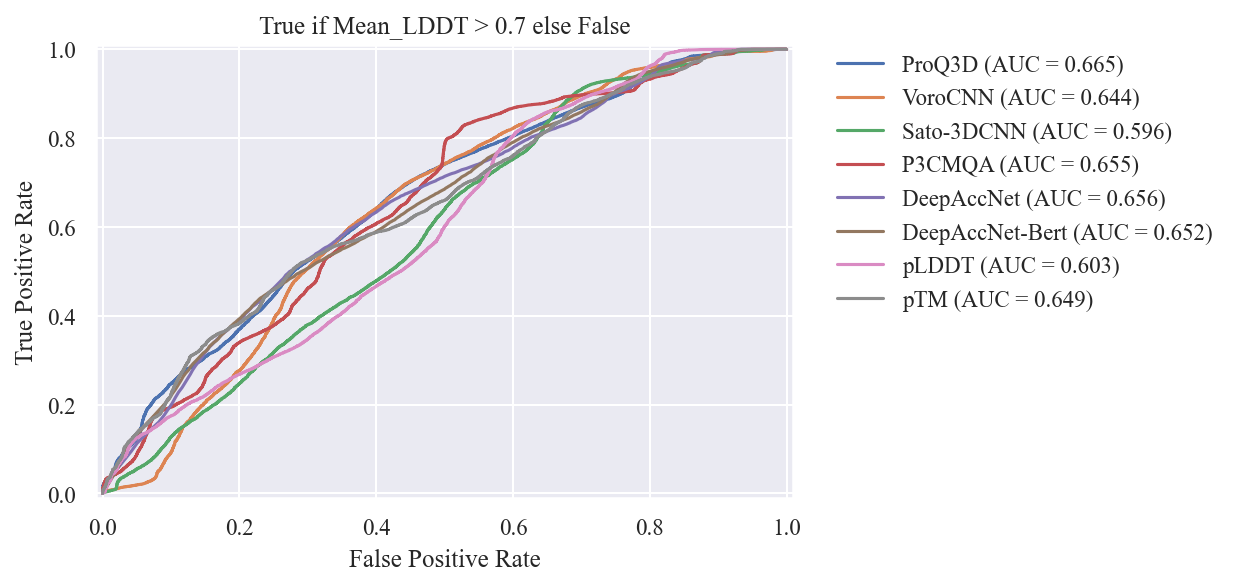

<Figure size 750x600 with 0 Axes>

True     77140
False    16660
Name: Mean_LDDT_0.8, dtype: int64


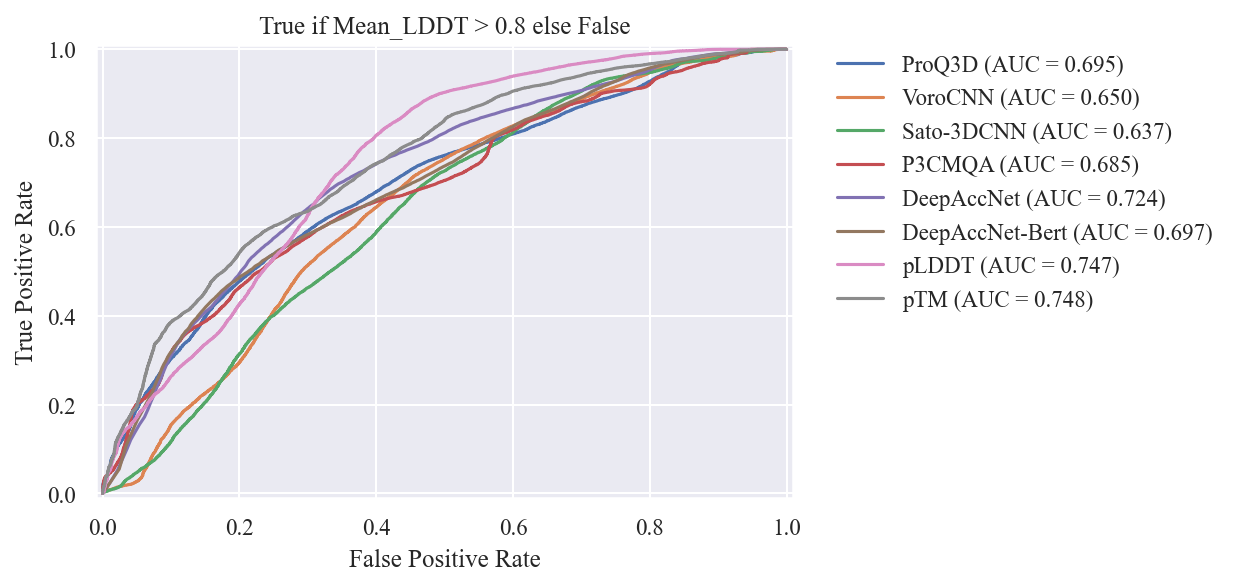

<Figure size 750x600 with 0 Axes>

In [11]:
# For model structures with pTMscore
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
thresholds = [0.5, 0.6, 0.7, 0.8]
counts = []
data = df[~df['pTM'].isna()]
for label in labels:
    for threshold in thresholds:
        l = f'{label}_{threshold}'
        print(data[l].value_counts())
        x = data[l]
        for score in methods:
            y = data[score]
            if y.isna().any():
                print(score)
                continue
            fpr, tpr, thres = roc_curve(x, y)
            a= auc(fpr, tpr)
            plt.title(f'True if {label} > {threshold} else False')
            plt.plot(fpr, tpr, label=f'{score} (AUC = {a:.3f})')
            plt.legend()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, facecolor='white', edgecolor='white')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.figure(figsize=(5, 4))
        plt.tight_layout()
        plt.show()

## Case 2: Negative examples are structures whose label value is lower than the maximum label value by more than threshold

In [12]:
# Against gdtts
mqa_methods = ['DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'VoroCNN', 'Sato-3DCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTM']

In [13]:
def split_tf_in_target(group: pd.DataFrame, label: str, threshold: float):
    """False for structures that are a threshold value away from the maximum label value in the target

    Args:
        group (pd.DataFrame): DataFrame of a target.
        label (str, optional): label name. Defaults to 'GDT_TS'.
        threshold (float, optional): Threshold. Defaults to 0.05.
    """
    max_value = group[label].max()
    l = f'{label}-{threshold}'
    group[l] = group[label] + threshold > max_value
    if group[l].all():
        return None
    return group
label = 'GDT_TS'
threshold = 0.05
rel_df = df.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)

True     45987
False    16413
Name: GDT_TS-0.05, dtype: int64
165


In [14]:
results = []
for method in methods:
    aucs = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
                continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
    results.append({'Method': method, 'AUC': np.mean(aucs)})
pd.DataFrame(results)

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Method   AUC
0              DOPE 0.672
1              SOAP 0.679
2            ProQ3D 0.630
3             SBROD 0.532
4           VoroCNN 0.613
5        Sato-3DCNN 0.646
6            P3CMQA 0.597
7        DeepAccNet 0.691
8   DeepAccNet-Bert 0.654
9             pLDDT 0.716
10              pTM   NaN

<ipython-input-15-f0f6c43aa79f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df[f'{label}-{threshold}']
<ipython-input-15-f0f6c43aa79f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Label'] = sample_df['Label'].astype(str)


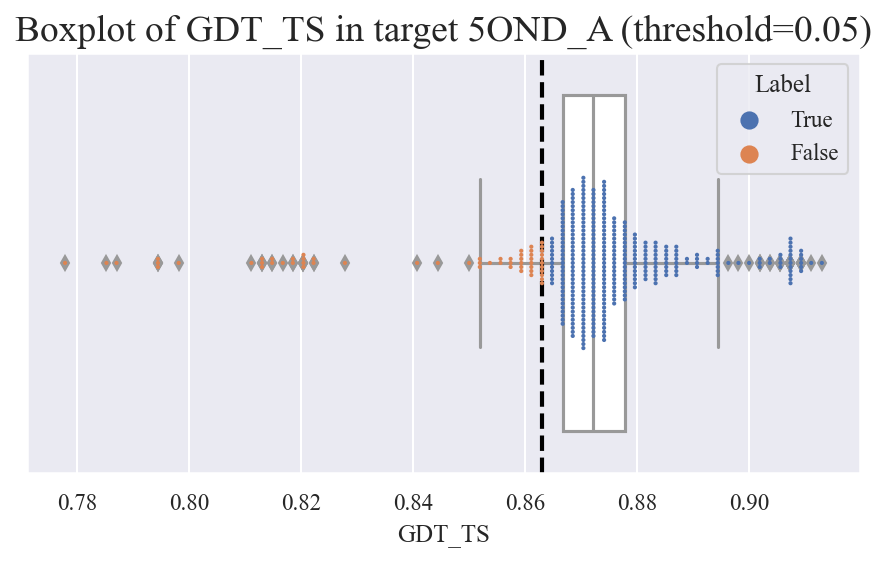

In [15]:
sample_target = rel_df['Target'].unique()[2]
threshold = 0.05
sample_df = rel_df[rel_df['Target'] == sample_target]
label = 'GDT_TS'
sample_df['Label'] = sample_df[f'{label}-{threshold}']
sample_df['Label'] = sample_df['Label'].astype(str)
sns.boxplot(data=sample_df, x=label, color='white')
sns.swarmplot(data=sample_df, x=label, s=2, hue='Label', y=[''] * len(sample_df), hue_order=['True', 'False'])
x = sample_df[label].max() - threshold
plt.axvline(x=x, color='black', linestyle='--', linewidth=2)
plt.title(f'Boxplot of GDT_TS in target {sample_target} (threshold={threshold})', fontsize=18)
plt.tight_layout()

### For structures with pTMscore

GDT_TS 0.05
True     21055
False     7445
Name: GDT_TS-0.05, dtype: int64
151


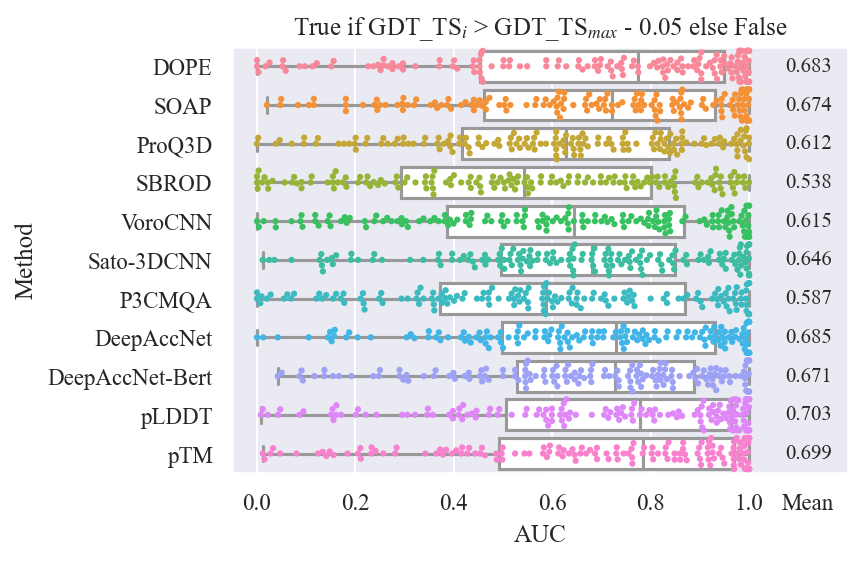

AUC
Method               
DOPE            0.683
DeepAccNet      0.685
DeepAccNet-Bert 0.671
P3CMQA          0.587
ProQ3D          0.612
SBROD           0.538
SOAP            0.674
Sato-3DCNN      0.646
VoroCNN         0.615
pLDDT           0.703
pTM             0.699

GDT_TS 0.1
True     7486
False    2714
Name: GDT_TS-0.1, dtype: int64
54


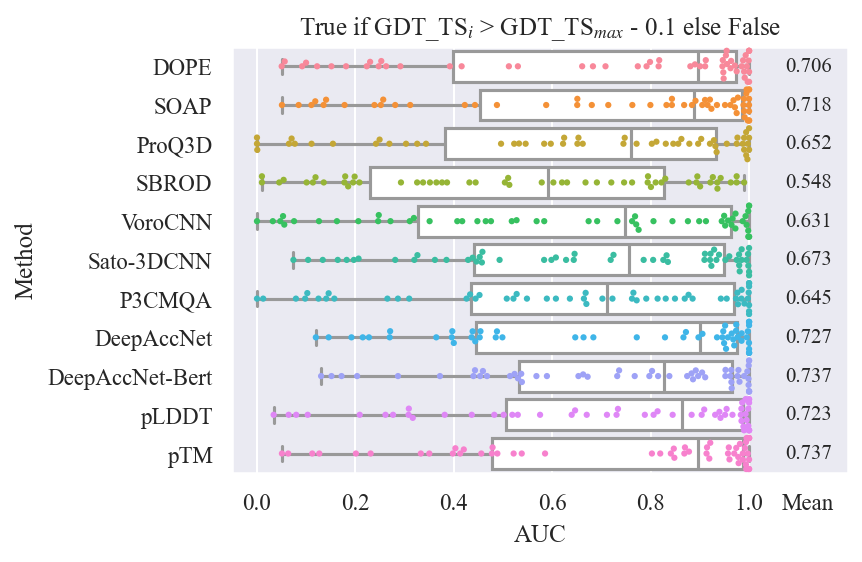

AUC
Method               
DOPE            0.706
DeepAccNet      0.727
DeepAccNet-Bert 0.737
P3CMQA          0.645
ProQ3D          0.652
SBROD           0.548
SOAP            0.718
Sato-3DCNN      0.673
VoroCNN         0.631
pLDDT           0.723
pTM             0.737

GDT_TS 0.15
True     4222
False    1278
Name: GDT_TS-0.15, dtype: int64
29


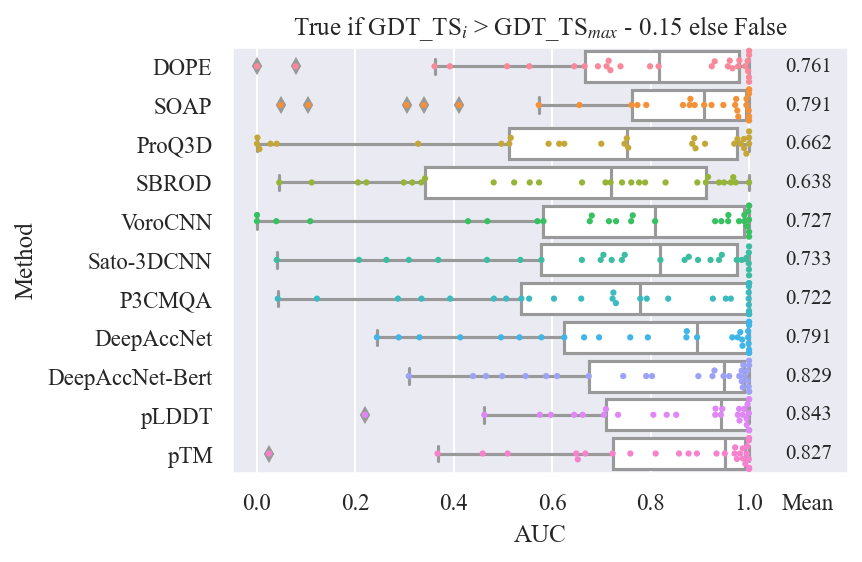

AUC
Method               
DOPE            0.761
DeepAccNet      0.791
DeepAccNet-Bert 0.829
P3CMQA          0.722
ProQ3D          0.662
SBROD           0.638
SOAP            0.791
Sato-3DCNN      0.733
VoroCNN         0.727
pLDDT           0.843
pTM             0.827

GDT_TS 0.2
True     2712
False     688
Name: GDT_TS-0.2, dtype: int64
18


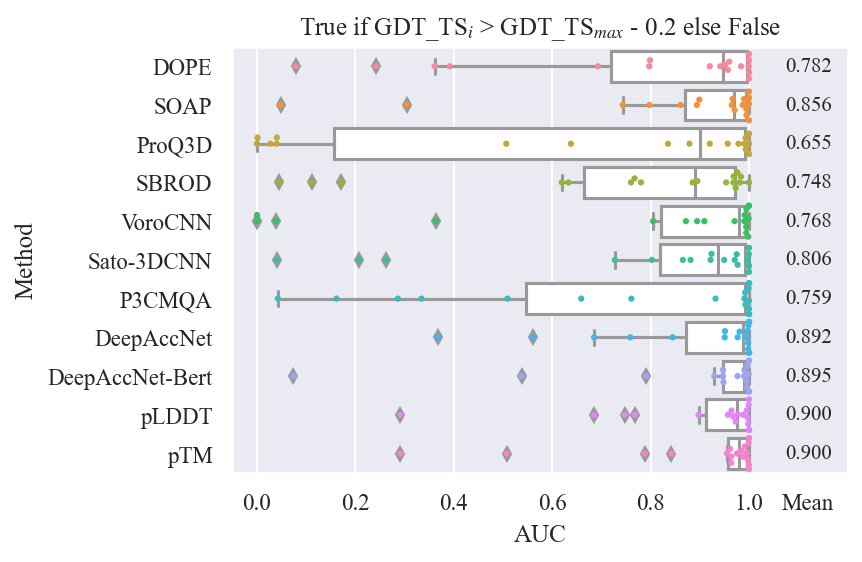

AUC
Method               
DOPE            0.782
DeepAccNet      0.892
DeepAccNet-Bert 0.895
P3CMQA          0.759
ProQ3D          0.655
SBROD           0.748
SOAP            0.856
Sato-3DCNN      0.806
VoroCNN         0.768
pLDDT           0.900
pTM             0.900

GDT_HA 0.05
True     41450
False    16150
Name: GDT_HA-0.05, dtype: int64
304


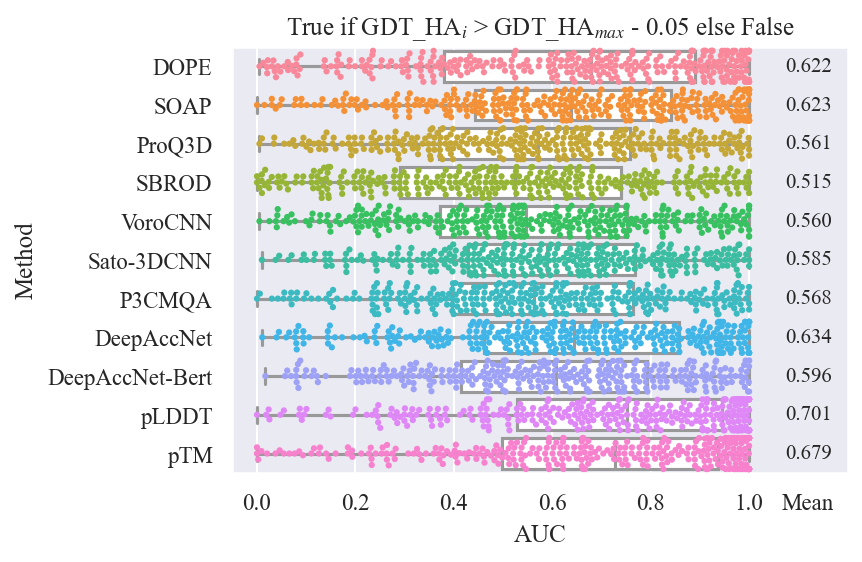

AUC
Method               
DOPE            0.622
DeepAccNet      0.634
DeepAccNet-Bert 0.596
P3CMQA          0.568
ProQ3D          0.561
SBROD           0.515
SOAP            0.623
Sato-3DCNN      0.585
VoroCNN         0.560
pLDDT           0.701
pTM             0.679

GDT_HA 0.1
True     13596
False     3904
Name: GDT_HA-0.1, dtype: int64
94


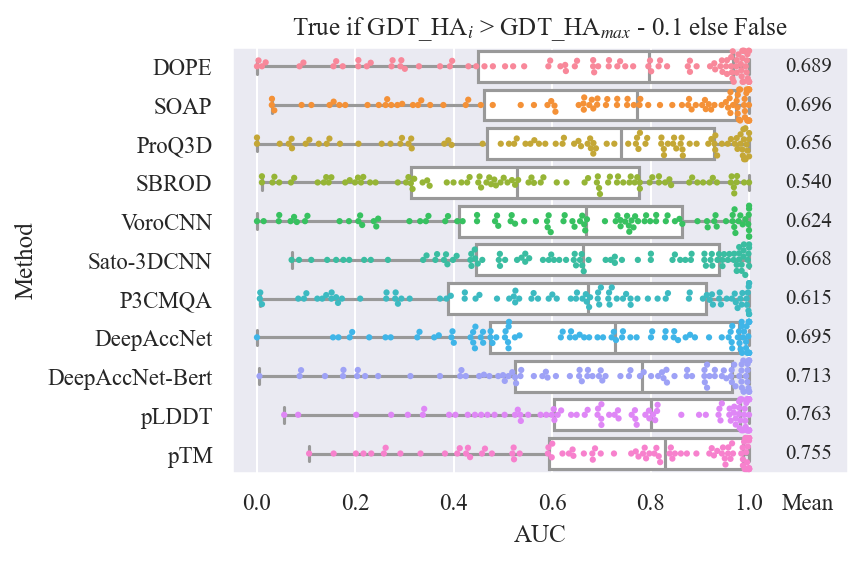

AUC
Method               
DOPE            0.689
DeepAccNet      0.695
DeepAccNet-Bert 0.713
P3CMQA          0.615
ProQ3D          0.656
SBROD           0.540
SOAP            0.696
Sato-3DCNN      0.668
VoroCNN         0.624
pLDDT           0.763
pTM             0.755

GDT_HA 0.15
True     5199
False    1401
Name: GDT_HA-0.15, dtype: int64
35


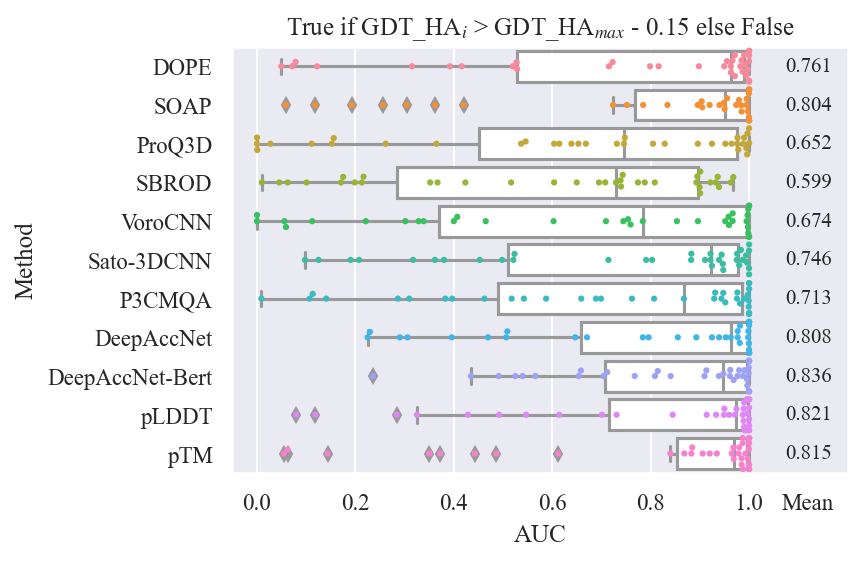

AUC
Method               
DOPE            0.761
DeepAccNet      0.808
DeepAccNet-Bert 0.836
P3CMQA          0.713
ProQ3D          0.652
SBROD           0.599
SOAP            0.804
Sato-3DCNN      0.746
VoroCNN         0.674
pLDDT           0.821
pTM             0.815

GDT_HA 0.2
True     3271
False     929
Name: GDT_HA-0.2, dtype: int64
22


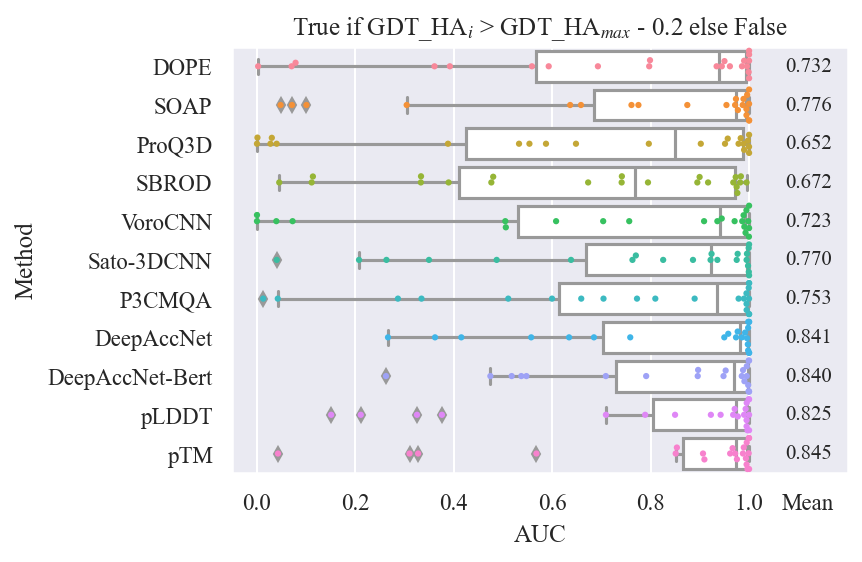

AUC
Method               
DOPE            0.732
DeepAccNet      0.841
DeepAccNet-Bert 0.840
P3CMQA          0.753
ProQ3D          0.652
SBROD           0.672
SOAP            0.776
Sato-3DCNN      0.770
VoroCNN         0.723
pLDDT           0.825
pTM             0.845

TMscore 0.05
True     11299
False     4501
Name: TMscore-0.05, dtype: int64
82


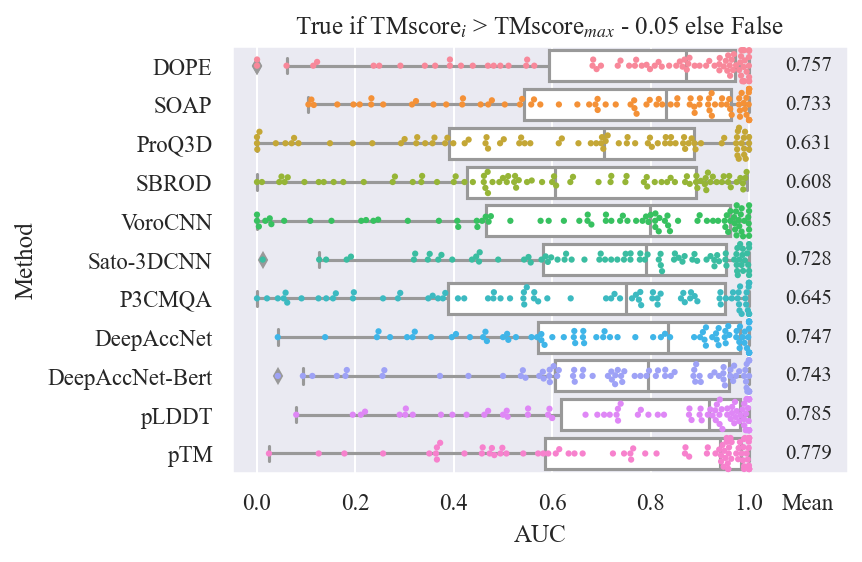

AUC
Method               
DOPE            0.757
DeepAccNet      0.747
DeepAccNet-Bert 0.743
P3CMQA          0.645
ProQ3D          0.631
SBROD           0.608
SOAP            0.733
Sato-3DCNN      0.728
VoroCNN         0.685
pLDDT           0.785
pTM             0.779

TMscore 0.1
True     4244
False    2156
Name: TMscore-0.1, dtype: int64
34


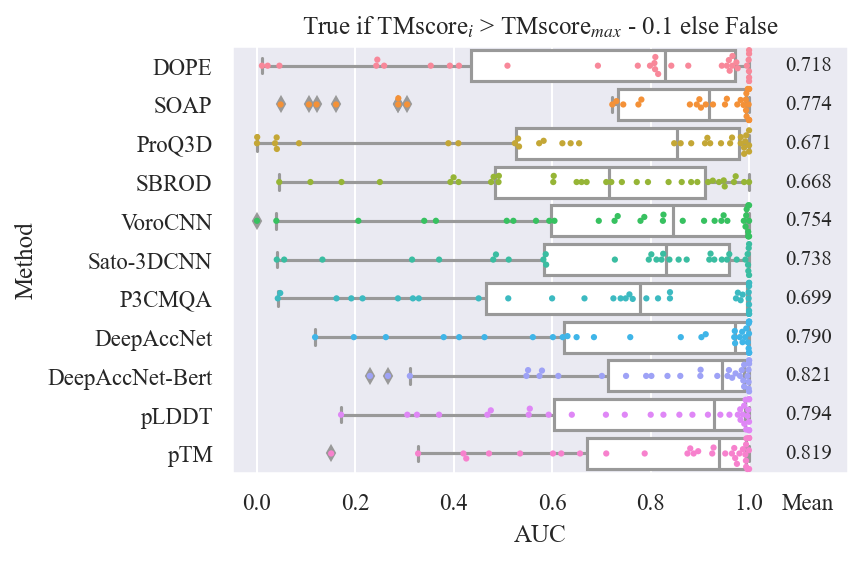

AUC
Method               
DOPE            0.718
DeepAccNet      0.790
DeepAccNet-Bert 0.821
P3CMQA          0.699
ProQ3D          0.671
SBROD           0.668
SOAP            0.774
Sato-3DCNN      0.738
VoroCNN         0.754
pLDDT           0.794
pTM             0.819

TMscore 0.15
True     3342
False    1258
Name: TMscore-0.15, dtype: int64
24


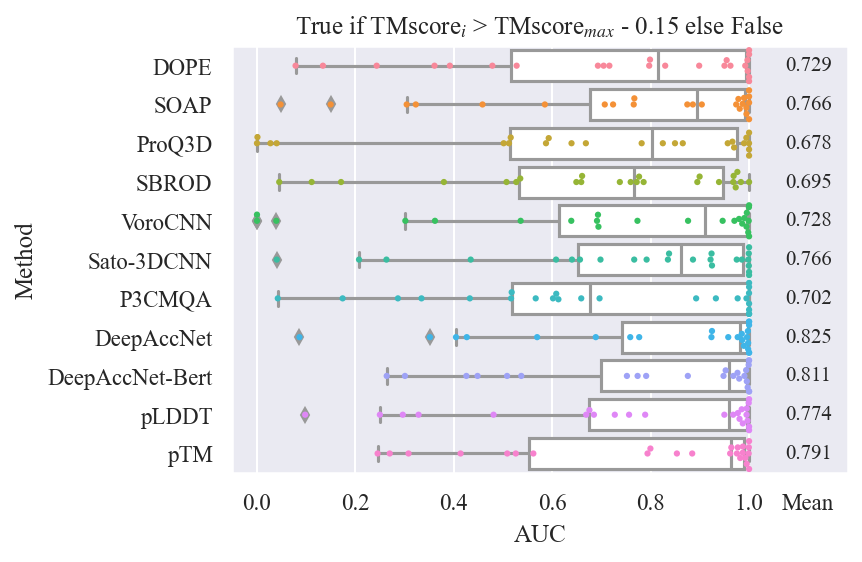

AUC
Method               
DOPE            0.729
DeepAccNet      0.825
DeepAccNet-Bert 0.811
P3CMQA          0.702
ProQ3D          0.678
SBROD           0.695
SOAP            0.766
Sato-3DCNN      0.766
VoroCNN         0.728
pLDDT           0.774
pTM             0.791

TMscore 0.2
True     2885
False     715
Name: TMscore-0.2, dtype: int64
19


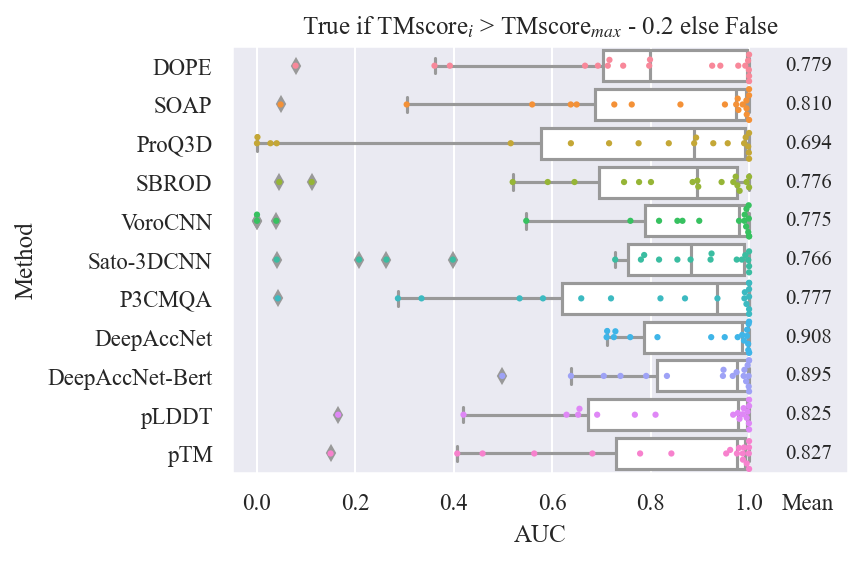

AUC
Method               
DOPE            0.779
DeepAccNet      0.908
DeepAccNet-Bert 0.895
P3CMQA          0.777
ProQ3D          0.694
SBROD           0.776
SOAP            0.810
Sato-3DCNN      0.766
VoroCNN         0.775
pLDDT           0.825
pTM             0.827

In [16]:
labels = ['GDT_TS', 'GDT_HA', 'TMscore']
thresholds = [0.05, 0.1, 0.15, 0.2]
data = df[~df['pTM'].isna()]
for label in labels:
    for threshold in thresholds:
        rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
        l = f'{label}-{threshold}'
        print(label, threshold)
        print(rel_df[l].value_counts())
        print(rel_df['Target'].unique().size)
        results = []
        for method in methods:
            aucs = []
            targets = []
            for name, group in rel_df.groupby('Target'):
                if group[method].isna().any():
                    continue
                fpr, tpr, thres = roc_curve(group[l], group[method])
                auc_score = auc(fpr, tpr)
                aucs.append(auc_score)
                targets.append(name)
            if len(aucs) == 0:
                continue
            results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
        cdf = pd.concat(results)
        plt.title(f'True if {label}$_{{i}}$ > {label}$_{{max}}$ - {threshold} else False')
        sns.boxplot(data=cdf, y='Method', x='AUC', color='white')
        sns.swarmplot(data=cdf, y='Method', x='AUC', s=3)
        xticks_max = 1.12
        plt.xlim(-0.05, 1.2)
        xticks = np.append(np.arange(0, 1.2, 0.2), [xticks_max])
        xticks_str = list(map(lambda x: f'{x:.1f}', xticks))
        xticks_str[-1] = 'Mean'
        plt.xticks(xticks, xticks_str)
        plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
        mean_series = cdf.groupby('Method').mean()['AUC']
        for i, method in enumerate(methods):
            if method not in mean_series.index:
                continue
            value = mean_series[method]
            plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
        plt.tight_layout()
        plt.show()
        display(cdf.groupby('Method').mean())

### Targets with low AUC (label: GDT_TS, threshold: 0.05)

In [17]:
# validation
label = 'GDT_TS'
threshold = 0.05
data = df[~df['pTM'].isna()]
rel_df = data.groupby('Target').apply(lambda x: split_tf_in_target(x, label, threshold)).reset_index(drop=True)
l = f'{label}-{threshold}'
print(label, threshold)
print(rel_df[l].value_counts())
print(rel_df['Target'].unique().size)
results = []
for method in methods:
    aucs = []
    targets = []
    for name, group in rel_df.groupby('Target'):
        if group[method].isna().any():
            continue
        fpr, tpr, thres = roc_curve(group[l], group[method])
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
        targets.append(name)
    if len(aucs) == 0:
        continue
    results.append(pd.DataFrame({'Method': method, 'AUC': aucs, 'Target': targets}))
cdf = pd.concat(results)
display(cdf.groupby('Method').mean())

GDT_TS 0.05
True     21055
False     7445
Name: GDT_TS-0.05, dtype: int64
151


AUC
Method               
DOPE            0.683
DeepAccNet      0.685
DeepAccNet-Bert 0.671
P3CMQA          0.587
ProQ3D          0.612
SBROD           0.538
SOAP            0.674
Sato-3DCNN      0.646
VoroCNN         0.615
pLDDT           0.703
pTM             0.699

In [18]:
method= 'pTM'
method_auc_df = cdf[cdf['Method'] == method].sort_values('AUC')
target_num = 10
sample_method_auc_df = method_auc_df.head(target_num)
display(sample_method_auc_df)
sample_targets = sample_method_auc_df['Target']

Method   AUC  Target
7      pTM 0.012  5Y30_A
11     pTM 0.015  5ZOE_A
46     pTM 0.028  6ILS_A
54     pTM 0.033  6K88_A
20     pTM 0.047  6CZQ_B
131    pTM 0.080  7COH_O
138    pTM 0.124  7KCT_A
43     pTM 0.134  6HYY_A
14     pTM 0.141  6AWI_A
51     pTM 0.148  6JMY_A

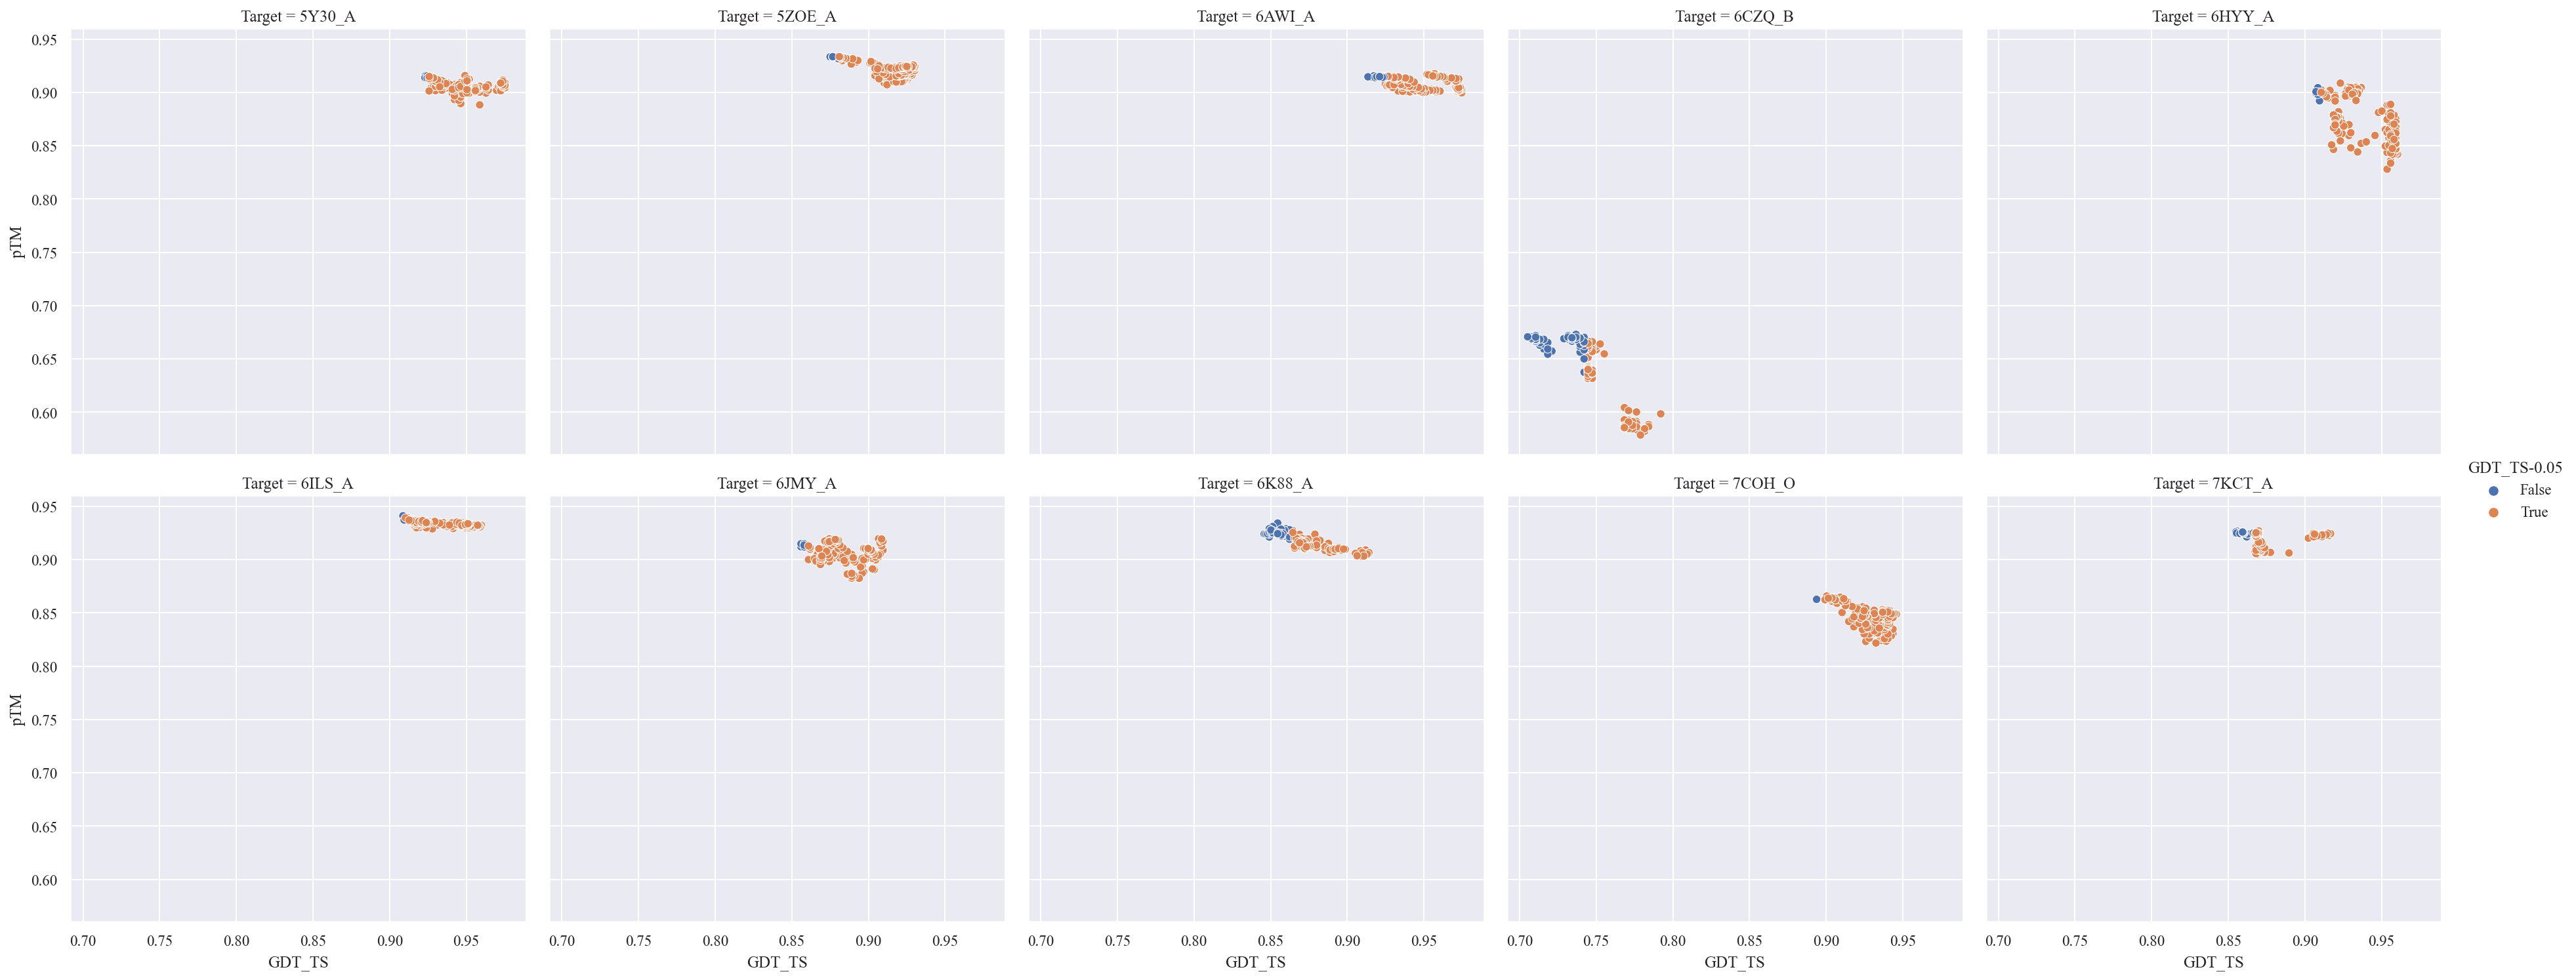

In [19]:
data = rel_df.query('Target in @sample_targets')
sns.relplot(data=data, x=label, y=method, kind='scatter', hue=l, col='Target', col_wrap=5)